In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report, roc_curve, auc 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



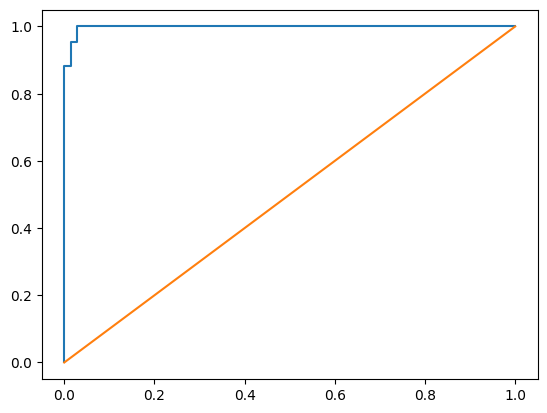

In [11]:
# Uždavinys 1
# Naudodami krūties vėžio duomenų rinkinį, prognozuokite, ar navikas yra gerybinis ar piktybinis, 
# naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

# Duomenų rinkinys: (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

data = pd.read_csv('data.csv')
data = data.drop(['Unnamed: 32', 'id'], axis=1)

data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()

In [12]:
skaler = StandardScaler()
X_train = skaler.fit_transform(X_train)
X_test = skaler.transform(X_test)
# print(X_train)
# print('---')
# print(X_test)
poly = PolynomialFeatures(degree= 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9473684210526315


In [13]:
# Uždavinys 2
# Naudojant širdies ligų duomenų rinkinį, prognozuokite, ar pacientas turi širdies ligą, 
# naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

# Duomenų rinkinys https://archive.ics.uci.edu/dataset/45/heart+disease

data = pd.read_csv('reprocessed.hungarian.data.csv', header=None, sep=' ')

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target']

data.columns = column_names
data = data.replace(-9, np.nan)
data.fillna(data.mean(), inplace=True)

X = data.drop('target', axis=1)
y = data['target'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.847457627118644
[[31  2]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.90      0.73      0.81        26

    accuracy                           0.85        59
   macro avg       0.86      0.84      0.84        59
weighted avg       0.85      0.85      0.84        59



In [14]:
skaler = StandardScaler()
X_train = skaler.fit_transform(X_train)
X_test = skaler.transform(X_test)
# print(X_train)
# print('---')
# print(X_test)
poly = PolynomialFeatures(degree= 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7796610169491526


In [53]:
column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('reprocessed.hungarian.data.csv', sep=' ', names= column_names)
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(y.values)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_poly, y_train)
y_pred = log_reg.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

[ 0.  1.  0.  3.  0.  0.  0.  0.  1.  0.  0.  3.  0.  3.  0.  0.  1.  0.
  1.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  3.  0.  1.  3.  0.  0.
  1.  0.  0.  0.  0.  4.  0.  0.  3.  0.  0.  0.  0.  1.  2.  4.  0.  0.
  0.  0.  1.  1.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  1.  0.
  2.  0.  2.  0.  2.  0.  0.  1.  0.  0.  1.  0.  2.  3.  3.  0.  2.  0.
  0.  0.  0.  2.  0.  2.  0.  0.  0.  0.  4.  0.  2.  1.  1.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  1.  1.  1.  0.  1.  3.  0.  0.  4.  0.  0.
  0.  0.  0.  0.  0.  1.  3.  3.  0.  1.  0.  0.  2.  1.  4.  4.  4.  0.
  3.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  4.  2.  0.  3.  0.  3.  4.
  0.  0.  0.  0.  3.  4.  0.  0.  0.  0.  0.  0.  0.  4.  4.  3.  0.  0.
  0.  1.  0.  3.  0.  0.  2.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.
  0.  2.  0.  0.  0.  2.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  4.  3.  2.  2.  0.  2.  3.  0.  1.  0

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('reprocessed.hungarian.data.csv', sep=' ', names=column_names)

df = df.dropna() 

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_poly, y_train)

y_pred = log_reg.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.6891891891891891
Confusion Matrix:
[[47  2  0  0  0]
 [ 6  1  2  1  1]
 [ 0  2  2  1  2]
 [ 4  0  1  0  0]
 [ 0  1  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89        49
         1.0       0.17      0.09      0.12        11
         2.0       0.40      0.29      0.33         7
         3.0       0.00      0.00      0.00         5
         4.0       0.25      0.50      0.33         2

    accuracy                           0.69        74
   macro avg       0.33      0.37      0.33        74
weighted avg       0.62      0.69      0.65        74



In [37]:
# Uždavinys 3
# Naudojant Pima Indians Diabetes duomenų rinkinį, prognozuokite, ar pacientas turi diabetą, naudodami logistinės regresijos modelį su polinominėmis 
# ypatybėmis.

# Duomenų rinkinys: Pima Indians Diabetes Database 
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

data = pd.read_csv('diabetes.csv')
data

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.7467532467532467
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [47]:
df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.7916666666666666
[[110  15]
 [ 25  42]]
0.7864583333333334
[[112  13]
 [ 28  39]]


c:\Users\Gabri\OneDrive\Stalinis kompiuteris\python uzduotys\240319DMO492DIE_mano\mokymai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# Uždavinys 4
# Naudojant kraujo donorystės duomenų rinkinį, prognozuokite, ar donoras atliks kraujo donorystę, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

# Duomenų rinkinys: Blood Transfusion Service Center Data Set

data = pd.read_csv('transfusion.data.csv')
data

X = data.drop('whether he/she donated blood in March 2007', axis=1)
y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.76
[[110   3]
 [ 33   4]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150



No PolynomialFeatures: 
Accuracy: 71.66%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       132
           1       0.62      0.09      0.16        55

    accuracy                           0.72       187
   macro avg       0.67      0.53      0.49       187
weighted avg       0.69      0.72      0.63       187
 


Confusion Matrix:
[[129   3]
 [ 50   5]]

TN True Negative:  [129] | FP False Positive: [3]
FN False Negative: [50] | TP True Positive:  [5]


With PolynomialFeatures: 
Accuracy: 76.47%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       132
           1       0.76      0.29      0.42        55

    accuracy                           0.76       187
   macro avg       0.76      0.63      0.64       187
weighted avg       0.76      0.76      0.73       187
 


Confusion Matrix:
[[127   5]
 [ 39  16]]

TN True Negative:  [1

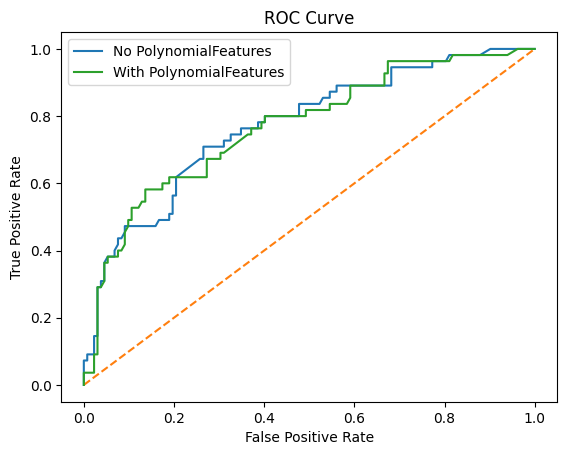

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def print_conf_matrix(conf_matrix):
    print(f"""
Confusion Matrix:
{conf_matrix}

TN True Negative:  [{conf_matrix[0][0]}] | FP False Positive: [{conf_matrix[0][1]}]
FN False Negative: [{conf_matrix[1][0]}] | TP True Positive:  [{conf_matrix[1][1]}]
""")
    
def evaluate_model(X_train, X_test, y_train, y_test, model, description, uzd=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(description)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    if uzd == 1:
        print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0, target_names=['Gerybinis', 'Piktybinis']), "\n")
    else:
        print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0), "\n")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print_conf_matrix(conf_matrix)
    print('='*50 + '\n')

def predict_cancer(x):
    warnings.filterwarnings("ignore", message="X does not have valid feature names")
    prediction = model.predict([x])
    result = 'Piktybinis' if prediction[0] == 1 else 'Gerybinis'
    print(result); return result



import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt



data = pd.read_csv("transfusion.data.csv")
data.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]

X = data.drop("Target", axis=1)
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=int(1e10))

# NoPoly:
model.fit(X_train, y_train)
evaluate_model(X_train, X_test, y_train, y_test, model, "No PolynomialFeatures: ")

# Poly:
model.fit(X_train_poly, y_train)
evaluate_model(X_train_poly, X_test_poly, y_train, y_test, model, "With PolynomialFeatures: ")

# ROC NoPoly
model.fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="No PolynomialFeatures")
plt.plot([0, 1], [0, 1], '--')

# ROC Poly
model.fit(X_train_poly, y_train)
fpr_p, tpr_p, _ = roc_curve(y_test, model.predict_proba(X_test_poly)[:, 1])
plt.plot(fpr_p, tpr_p, label="With PolynomialFeatures")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()